<a href="https://colab.research.google.com/github/mjiii25/posco-academy/blob/main/Big-Data/Assignment-1/vitalfew-graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [2]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

### **데이터 구성하기**

In [3]:
df_raw = pd.read_excel('/content/mydrive/MyDrive/1. 실습데이터 설명(Data Dictionary).xlsx',
                       sheet_name = 'AIR_POLLUTION')

print(df_raw.shape)
df_raw.head(10)

(366, 15)


,MeasDate,PM10,PM25,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
0,2019-07-01,29.0,20.0,0.054,0.021,0.5,0.003,24.034783,0.00,2.304348,249.130435,63.173913,995.073913,0.0,5.695652
1,2019-07-02,26.0,19.0,0.053,0.020,0.5,0.003,24.287500,0.00,2.258333,264.583333,63.166667,998.600000,0.0,3.833333
2,2019-07-03,30.0,20.0,0.042,0.023,0.4,0.003,24.175000,0.00,1.791667,280.000000,65.333333,998.270833,0.0,6.291667
3,2019-07-04,28.0,17.0,0.034,0.026,0.4,0.003,25.354167,0.00,2.037500,262.500000,58.625000,996.633333,0.0,2.541667
4,2019-07-05,29.0,19.0,0.045,0.035,0.5,0.003,27.295833,0.00,1.454167,175.416667,45.541667,993.537500,0.0,3.916667
5,2019-07-06,29.0,21.0,0.043,0.032,0.5,0.003,29.866667,0.00,1.541667,80.000000,39.708333,993.691667,0.0,3.500000
6,2019-07-07,16.0,12.0,0.043,0.014,0.3,0.002,26.858333,0.00,2.266667,82.916667,43.541667,997.450000,0.0,6.583333
7,2019-07-08,10.0,6.0,0.035,0.019,0.3,0.002,25.125000,0.00,1.962500,75.833333,45.333333,997.941667,0.0,6.583333
8,2019-07-09,10.0,6.0,0.033,0.019,0.4,0.002,25.112500,0.00,1.837500,81.250000,46.250000,996.712500,0.0,4.416667
9,2019-07-10,9.0,6.0,0.027,0.019,0.3,0.002,22.787500,0.82,2.125000,80.000000,61.000000,997.329167,0.0,8.291667


In [4]:
df_raw.drop('PM25', axis = 1, inplace = True)

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   MeasDate   366 non-null    datetime64[ns]
 1   PM10       365 non-null    float64       
 2   O3         365 non-null    float64       
 3   NO2        365 non-null    float64       
 4   CO         311 non-null    float64       
 5   SO2        365 non-null    float64       
 6   TEMP       366 non-null    float64       
 7   RAIN       366 non-null    float64       
 8   WIND       366 non-null    float64       
 9   WIND_DIR   366 non-null    float64       
 10  HUMIDITY   366 non-null    float64       
 11  ATM_PRESS  366 non-null    float64       
 12  SNOW       366 non-null    float64       
 13  CLOUD      366 non-null    float64       
dtypes: datetime64[ns](1), float64(13)
memory usage: 40.2 KB


In [6]:
df_raw.describe().round(3)

,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
count,365.000,365.000,365.000,311.000,365.000,366.000,366.000,366.000,366.000,366.000,366.000,366.000,366.000
mean,33.422,0.024,0.027,0.517,0.003,13.863,0.382,2.225,209.420,60.292,1005.846,0.023,5.063
std,15.938,0.012,0.010,0.153,0.001,9.830,1.122,0.723,70.753,14.533,8.125,0.222,2.986
min,5.000,0.002,0.008,0.300,0.002,-7.954,0.000,0.942,50.000,17.875,983.800,0.000,0.000
25%,22.000,0.014,0.019,0.400,0.003,5.493,0.000,1.722,160.000,49.677,999.423,0.000,2.510
50%,31.000,0.023,0.025,0.500,0.003,13.996,0.000,2.094,221.042,61.062,1006.408,0.000,5.312
75%,42.000,0.032,0.034,0.600,0.003,23.073,0.115,2.620,265.833,69.917,1011.571,0.000,7.573
max,101.000,0.062,0.059,1.000,0.005,31.721,11.800,5.883,351.250,94.958,1025.529,3.188,10.000


**결측값 확인하기**

In [7]:
df_raw.isnull().sum()

MeasDate      0
PM10          1
O3            1
NO2           1
CO           55
SO2           1
TEMP          0
RAIN          0
WIND          0
WIND_DIR      0
HUMIDITY      0
ATM_PRESS     0
SNOW          0
CLOUD         0
dtype: int64

In [8]:
df_raw.fillna(df_raw.median(), inplace = True)

df_raw.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
0,2019-07-01,29.0,0.054,0.021,0.5,0.003,24.034783,0.0,2.304348,249.130435,63.173913,995.073913,0.0,5.695652
1,2019-07-02,26.0,0.053,0.020,0.5,0.003,24.287500,0.0,2.258333,264.583333,63.166667,998.600000,0.0,3.833333
2,2019-07-03,30.0,0.042,0.023,0.4,0.003,24.175000,0.0,1.791667,280.000000,65.333333,998.270833,0.0,6.291667
3,2019-07-04,28.0,0.034,0.026,0.4,0.003,25.354167,0.0,2.037500,262.500000,58.625000,996.633333,0.0,2.541667
4,2019-07-05,29.0,0.045,0.035,0.5,0.003,27.295833,0.0,1.454167,175.416667,45.541667,993.537500,0.0,3.916667


In [9]:
df_raw.isnull().sum()

MeasDate     0
PM10         0
O3           0
NO2          0
CO           0
SO2          0
TEMP         0
RAIN         0
WIND         0
WIND_DIR     0
HUMIDITY     0
ATM_PRESS    0
SNOW         0
CLOUD        0
dtype: int64

In [10]:
df_raw_x = df_raw.drop(['MeasDate', 'PM10'], axis = 1, inplace = False)
df_raw_y = df_raw['PM10']

In [11]:
print(df_raw_x.shape)
df_raw_x.head()

(366, 12)


,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
0,0.054,0.021,0.5,0.003,24.034783,0.0,2.304348,249.130435,63.173913,995.073913,0.0,5.695652
1,0.053,0.020,0.5,0.003,24.287500,0.0,2.258333,264.583333,63.166667,998.600000,0.0,3.833333
2,0.042,0.023,0.4,0.003,24.175000,0.0,1.791667,280.000000,65.333333,998.270833,0.0,6.291667
3,0.034,0.026,0.4,0.003,25.354167,0.0,2.037500,262.500000,58.625000,996.633333,0.0,2.541667
4,0.045,0.035,0.5,0.003,27.295833,0.0,1.454167,175.416667,45.541667,993.537500,0.0,3.916667


In [12]:
print(df_raw_y.shape)
df_raw_y.head()

(366,)


0    29.0
1    26.0
2    30.0
3    28.0
4    29.0
Name: PM10, dtype: float64

### **변수 시각화하기**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


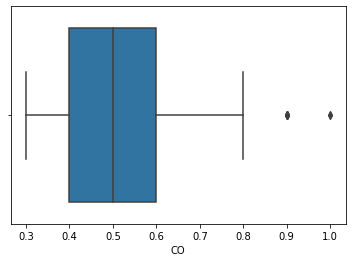

In [ ]:
sns.boxplot(df_raw_x['CO'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


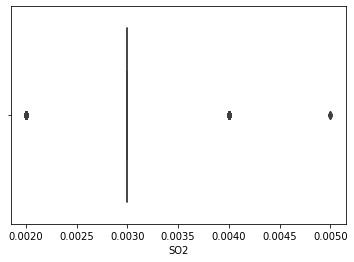

In [ ]:
sns.boxplot(df_raw_x['SO2'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


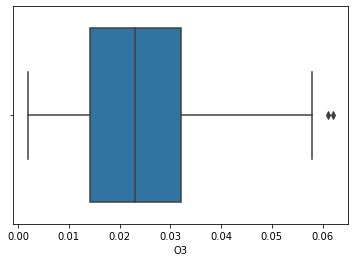

In [ ]:
sns.boxplot(df_raw_x['O3'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


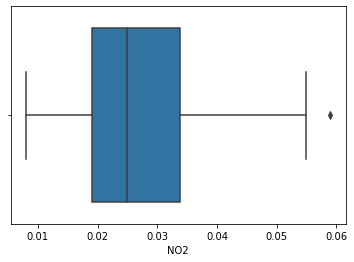

In [ ]:
sns.boxplot(df_raw_x['NO2'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


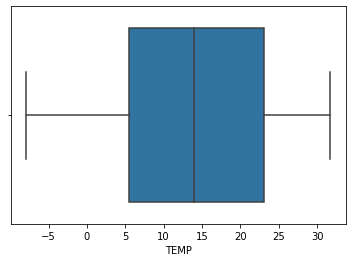

In [ ]:
sns.boxplot(df_raw_x['TEMP'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


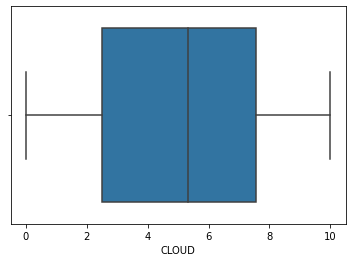

In [ ]:
sns.boxplot(df_raw_x['CLOUD'])

- CO, SO2, O3, NO2에서 이상치가 각각 2개, 3개, 2개, 1개 발견된다.
- TEMP와 CLOUD의 데이터는 이상치 없이 모두 사분위수 범위 내에 분포하고 있다.

In [ ]:
q1, q3 = np.percentile(df_raw_x['O3'], [25, 75])
IQR = q3 - q1
lower = q1 - 1.5 * IQR
upper = q3 + 1.5 * IQR

In [ ]:
for cols in df_raw_x.columns :

    outlier_idx = pd.DataFrame()

    outlier = pd.DataFrame(df_raw_x.loc[(df_raw_x[cols] < lower) | (df_raw_x[cols] > upper), cols])
    result = pd.concat([outlier_idx, outlier], axis = 0)

result

,CLOUD
0,5.695652
1,3.833333
2,6.291667
3,2.541667
4,3.916667
...,...
361,8.727273
362,6.208333
363,2.625000
364,7.583333


**CO, SO2, O3, NO2의 분포 확인하기**

In [20]:
df_raw_x['CO'].value_counts()

0.5    145
0.4     90
0.6     43
0.3     30
0.7     26
0.8     22
0.9      8
1.0      2
Name: CO, dtype: int64

366

In [38]:
testing = 
testing

0.003    63.387978
0.004    18.306011
0.002    17.213115
0.005     1.092896
Name: SO2, dtype: float64

In [25]:
testing = df_raw_x['CO'].astype('object')

testing.value_counts()

0.5    145
0.4     90
0.6     43
0.3     30
0.7     26
0.8     22
0.9      8
1.0      2
Name: CO, dtype: int64

In [48]:
len(df_raw_x['CO'])

366

In [45]:
df_raw_x['CO'].value_counts() / len(df_raw_x['C0'])
#  * 100

KeyError: ignored

([<matplotlib.patches.Wedge at 0x7fbda6757f10>,
 [Text(-1.0041304469104975, -0.4491347744133433, '0.003'),
  Text(1.0868966851805422, -0.16927963771094767, '0.004'),
  Text(0.6296443621666609, 0.9019689446936291, '0.002'),
  Text(0.03776033701188686, 1.0993516984790395, '0.005')],
 [Text(-0.547707516496635, -0.24498260422545998, '63.39%'),
  Text(0.5928527373712047, -0.09233434784233509, '18.31%'),
  Text(0.3434423793636332, 0.4919830607419794, '17.21%'),
  Text(0.02059654746102919, 0.5996463809885669, '1.09%')])

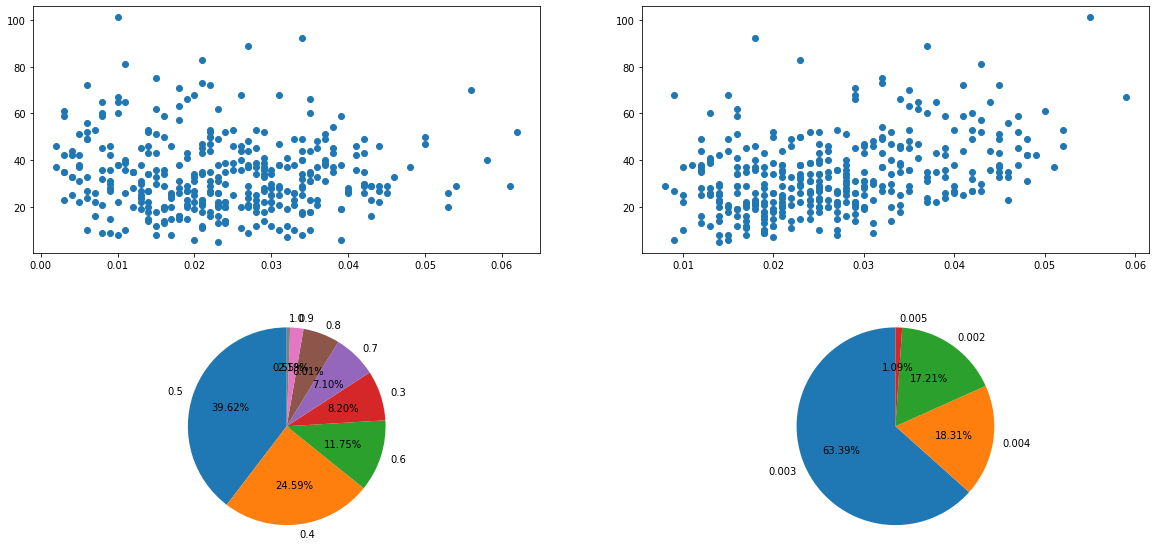

In [49]:
fig, axes = plt.subplots(2, 2, figsize = (20,10))

axes[0,0].scatter(df_raw_x['O3'], df_raw_y)
axes[0,1].scatter(df_raw_x['NO2'], df_raw_y)
axes[1,0].pie(df_raw_x['CO'].value_counts() / len(df_raw_x['CO']) * 100,
              labels = [0.5, 0.4, 0.6, 0.3, 0.7, 0.8, 0.9, 1.0],
              autopct='%.2f%%',
              startangle = 90)
axes[1,1].pie(df_raw_x['SO2'].value_counts() / len(df_raw_x['SO2']) * 100,
              labels = [0.003, 0.004, 0.002, 0.005],
              autopct='%.2f%%',
              startangle = 90)

# axes[0,0].hist(df_raw_x['CO'], label = 'CO', alpha = 0.7)
# axes[0,0].set_xlabel('CO')
# axes[0,0].set_ylabel('count')

# axes[0,1].hist(df_raw_x['SO2'], label = 'SO2', alpha = 0.7)
# axes[0,1].set_xlabel('SO2')
# axes[0,1].set_ylabel('count')

# axes[1,0].hist(df_raw_x['O3'], label = 'O3', alpha = 0.7)
# axes[1,0].set_xlabel('O3')
# axes[1,0].set_ylabel('count')

# axes[1,1].hist(df_raw_x['NO2'], label = 'NO2', alpha = 0.7)
# axes[1,1].set_xlabel('NO2')
# axes[1,1].set_ylabel('count')

In [57]:
df_raw_x.groupby('SO2')[''].count()

,O3,NO2,CO,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
SO2,,,,,,,,,,,
0.002,63,63,63,63,63,63,63,63,63,63,63
0.003,232,232,232,232,232,232,232,232,232,232,232
0.004,67,67,67,67,67,67,67,67,67,67,67
0.005,4,4,4,4,4,4,4,4,4,4,4


KeyError: ignored

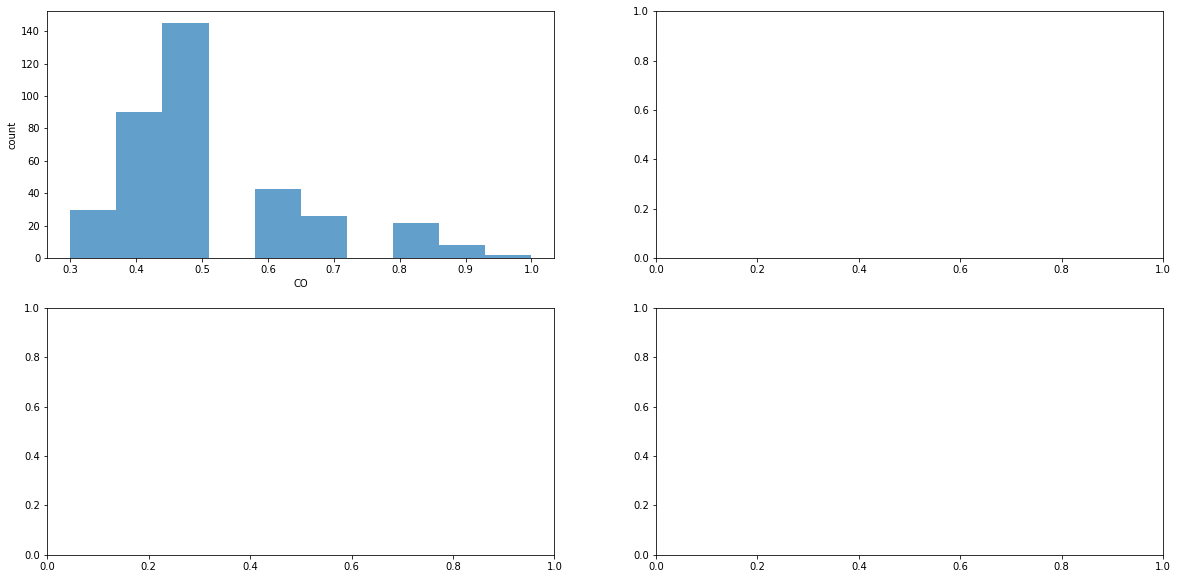

In [54]:
fig, axes = plt.subplots(2, 2, figsize = (20,10))

axes[0,0].hist(df_raw_x['CO'], label = 'CO', alpha = 0.7)
axes[0,0].set_xlabel('CO')
axes[0,0].set_ylabel('count')

axes[0,1].bar(df_raw_x['SO2'], height = df_raw_x.loc[:, 'PM10'])
axes[0,1].set_xlabel('SO2')
axes[0,1].set_ylabel('count')

axes[1,0].hist(df_raw_x['O3'], label = 'O3', alpha = 0.7)
axes[1,0].set_xlabel('O3')
axes[1,0].set_ylabel('count')

axes[1,1].hist(df_raw_x['NO2'], label = 'NO2', alpha = 0.7)
axes[1,1].set_xlabel('NO2')
axes[1,1].set_ylabel('count')

- 